In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

In [2]:
weather = pd.read_csv("weather.csv")
weather.tail(10)

,humidity,temperature,clearness
33,74,289.62,1
34,79,290.57,2
35,43,287.80,1
36,90,288.84,2
37,86,283.57,2
38,35,312.92,1
39,81,281.96,2
40,77,292.23,2
41,61,288.84,1
42,80,293.45,1


<Axes: xlabel='humidity', ylabel='temperature'>

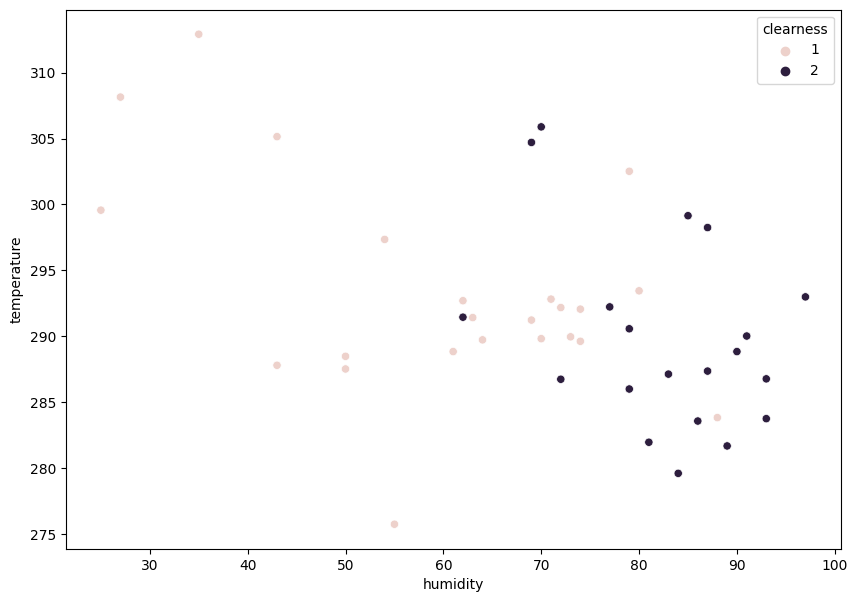

In [3]:
sns.scatterplot(x="humidity", y="temperature", hue="clearness", data=weather)

In [4]:
# test-train split
X = weather[["humidity","temperature"]].to_numpy()
y = weather[["clearness"]].to_numpy() -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state= 0)

In [5]:
## Initiate classifier and train it using the X_train data and the y_train labels
## make sure you instantiate your classifier and name it model
model = Sequential()
model.add(Dense(3, activation='leaky_relu', kernel_initializer='he_normal', input_shape=(2,)))
model.add(Dense(2, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [6]:
## train your model
model.fit(X_train, y_train, epochs=2000, batch_size=30)

Epoch 1/2000
2/2 [==============================] - 1s 10ms/step - loss: 81.0476 - accuracy: 0.4444
Epoch 2/2000
2/2 [==============================] - 0s 8ms/step - loss: 78.7950 - accuracy: 0.4444
Epoch 3/2000
2/2 [==============================] - 0s 8ms/step - loss: 76.5865 - accuracy: 0.4444
Epoch 4/2000
2/2 [==============================] - 0s 8ms/step - loss: 74.3880 - accuracy: 0.4444
Epoch 5/2000
2/2 [==============================] - 0s 7ms/step - loss: 72.1617 - accuracy: 0.4444
Epoch 6/2000
2/2 [==============================] - 0s 7ms/step - loss: 69.9230 - accuracy: 0.4444
Epoch 7/2000
2/2 [==============================] - 0s 6ms/step - loss: 67.7570 - accuracy: 0.4444
Epoch 8/2000
2/2 [==============================] - 0s 4ms/step - loss: 65.4234 - accuracy: 0.4444
Epoch 9/2000
2/2 [==============================] - 0s 7ms/step - loss: 63.2335 - accuracy: 0.4444
Epoch 10/2000
2/2 [==============================] - 0s 6ms/step - loss: 60.9862 - accuracy: 0.4444
Epoch 11

In [7]:
## test the accuracy of your model
loss,acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 184ms/step - loss: 0.2297 - accuracy: 0.8571


313/313 [==============================] - 0s 1ms/step


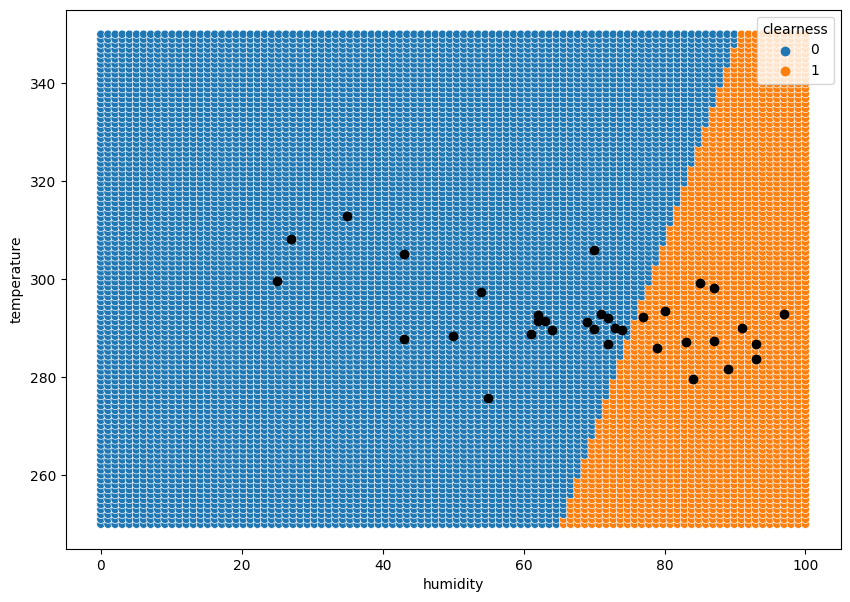

In [8]:
humidity = np.linspace(0,100,100)
temperature = np.linspace(250,350,100)
from itertools import product
randomdata = np.array(list(product(humidity, temperature)))
g = model.predict(randomdata)
db=pd.DataFrame({"humidity":randomdata[:,0],"temperature":randomdata[:,1],"clearness":list(map(np.argmax,g)) })
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
sns.scatterplot(data=db,x="humidity",y="temperature",hue="clearness")
plt.scatter(X_train[:,0],X_train[:,1],color="black")

In [9]:
# dump your classifier into a pickle file
pickle.dump(model,open("model.pickle",'wb'))

In [10]:
# test pickled file
file = open('model.pickle','rb')
model2 = pickle.load(file)
file.close()

print(model2)
## test the accuracy of your loaded model and compare